<a href="https://colab.research.google.com/github/kesshar/Portfolio_Optimization/blob/main/Week_1_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of historical data for 5 stocks(CDSL, RELIANCE, TEJASNET, TCS, HCL) - compute returns, volatility and correlation

In [4]:
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from datetime import datetime


In [6]:
tickers = ['CDSL.NS', 'RELIANCE.NS', 'TEJASNET.NS', 'TCS.NS', 'HCLTECH.NS']
start_date = "2022-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,CDSL.NS,HCLTECH.NS,RELIANCE.NS,TCS.NS,TEJASNET.NS
Date,,,,,
2022-01-03,741.375305,1152.740234,1109.376343,3608.009766,426.950012
2022-01-04,742.366821,1159.085571,1134.412720,3671.328857,425.000000
2022-01-05,738.811890,1139.354004,1139.719971,3648.836182,430.149994
2022-01-06,748.992920,1116.884033,1115.214355,3598.275879,425.950012
2022-01-07,749.694275,1121.795410,1124.213623,3641.795898,425.649994


## Computing Returns

In [7]:
returns = data.pct_change().dropna()
returns.head()

Ticker,CDSL.NS,HCLTECH.NS,RELIANCE.NS,TCS.NS,TEJASNET.NS
Date,,,,,
2022-01-04,0.001337,0.005505,0.022568,0.017550,-0.004567
2022-01-05,-0.004789,-0.017023,0.004678,-0.006127,0.012118
2022-01-06,0.013780,-0.019722,-0.021501,-0.013857,-0.009764
2022-01-07,0.000936,0.004397,0.008070,0.012095,-0.000704
2022-01-10,-0.000871,-0.001899,0.000821,0.006838,0.049924


## Daily volatility (standard deviation)

In [8]:
daily_volatility = returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

print("Annual Volatility:")
print(annual_volatility)

Annual Volatility:
Ticker
CDSL.NS        0.379661
HCLTECH.NS     0.243852
RELIANCE.NS    0.227486
TCS.NS         0.212171
TEJASNET.NS    0.496900
dtype: float64


## Correlation matrix

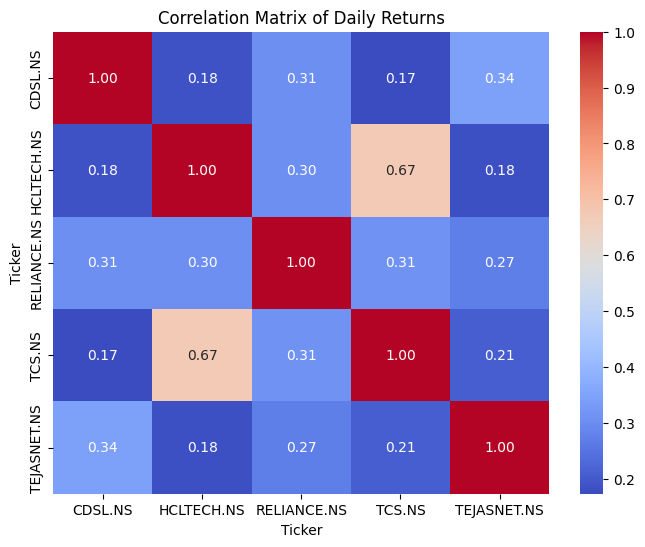

In [9]:
correlation_matrix = returns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Daily Returns")
plt.show()

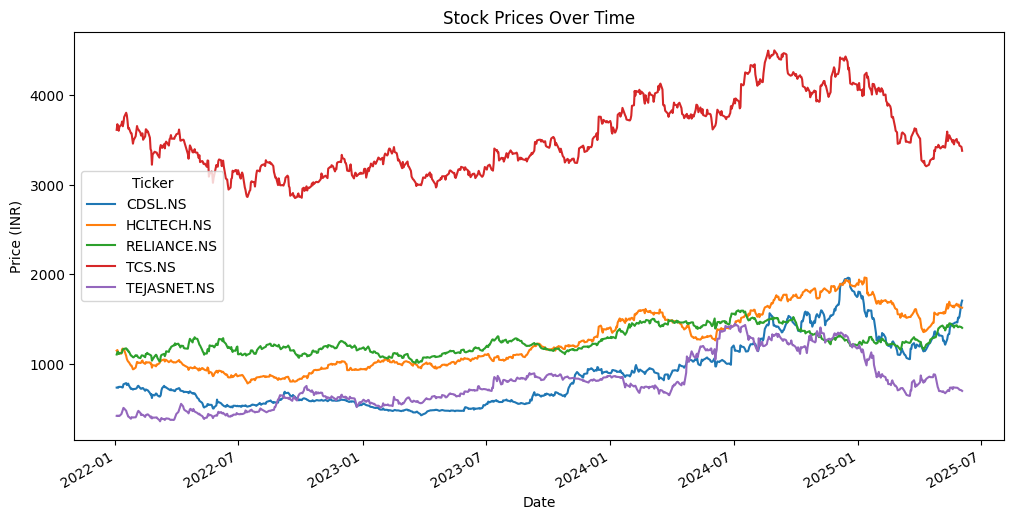

In [10]:
data.plot(figsize=(12,6), title="Stock Prices Over Time")
plt.ylabel("Price (INR)")
plt.xlabel("Date")
plt.show()